**I try predict future close prices of gold by open prices. For this task i use a regression neural network by Keras package**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/historical-commodity-prices-from-20002022/commodity 2000-2022.csv


In [2]:
from keras import models, layers
from keras import metrics
import matplotlib.pyplot as plt

In [3]:
#Download data
pd_loc=pd.read_csv("../input/historical-commodity-prices-from-20002022/commodity 2000-2022.csv")
pd_loc.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,Gold,2000-01-04,281.0,281.0,281.0,282.7,4
1,Gold,2000-01-05,283.2,283.2,283.2,281.1,16
2,Gold,2000-01-06,281.4,281.4,281.4,281.4,0
3,Gold,2000-01-07,281.9,281.9,281.9,281.9,0
4,Gold,2000-01-10,281.7,281.7,281.7,281.7,0


In [4]:
# I like work with data by numpy arrays
pd_data = pd_loc.to_numpy()
print(pd_data)

[['Gold' '2000-01-04' 281.0 ... 281.0 282.7 4]
 ['Gold' '2000-01-05' 283.2 ... 283.2 281.1 16]
 ['Gold' '2000-01-06' 281.4 ... 281.4 281.4 0]
 ...
 ['Wheat' '2022-03-29' 1922.4 ... 1888.3 1912.2 128051]
 ['Wheat' '2022-03-30' 1918.4 ... 1914.5 1933.5 17765]
 ['Wheat' '2022-03-31' 1932.5 ... 1918.95 1919.7 0]]


In [5]:
#function for create arrays of data
def selector(data):
    count=0
    op=np.zeros(len(data)) #open price
    cl = np.zeros(len(data)) #close price
    
    while count<len(data):
        op[count]=data[count][2]
        cl[count]=data[count][5]
        
        count+=1
        
    return op, cl

In [6]:

op, cl = selector(pd_data)

In [7]:
#Prepare data for download in neural network


mean=op.mean()
op-=mean
std=op.std()
op/=std

cl-=mean
cl/=std

In [8]:
#Reshape input data
op_t = op.reshape(-1, 1)

In [9]:
#Create neural network
nreg = models.Sequential()

nreg.add(layers.Dense(128, activation='relu'))
nreg.add(layers.Dense(128, activation='relu'))
nreg.add(layers.Dense(1)) #because regression network (1)

nreg.compile(loss='mse', optimizer='rmsprop', metrics='mae') #because (1)

2022-04-01 17:49:30.869662: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
#I took this interval for train network to predict future gold prices
nreg.fit(op[2000:3500], cl[2000:3500], batch_size=256, epochs=25, validation_split=0.2)

2022-04-01 17:49:31.067563: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
5/5 [==============================] - 1s 59ms/step - loss: 0.2930 - mae: 0.4197 - val_loss: 0.1472 - val_mae: 0.3390
Epoch 2/25
5/5 [==============================] - 0s 14ms/step - loss: 0.0630 - mae: 0.1816 - val_loss: 0.0276 - val_mae: 0.1288
Epoch 3/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0128 - mae: 0.0812 - val_loss: 0.0061 - val_mae: 0.0680
Epoch 4/25
5/5 [==============================] - 0s 14ms/step - loss: 0.0043 - mae: 0.0524 - val_loss: 0.0037 - val_mae: 0.0519
Epoch 5/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0026 - mae: 0.0410 - val_loss: 0.0022 - val_mae: 0.0394
Epoch 6/25
5/5 [==============================] - 0s 14ms/step - loss: 0.0017 - mae: 0.0334 - val_loss: 0.0024 - val_mae: 0.0382
Epoch 7/25
5/5 [==============================] - 0s 14ms/step - loss: 0.0014 - mae: 0.0299 - val_loss: 0.0013 - val_mae: 0.0277
Epoch 8/25
5/5 [==============================] - 0s 13ms/step - loss: 0.0013 - mae: 0.0280 - val

In [11]:
#Take for predict full interval of gold prices
result=nreg.predict(op[:5693])
gold_cl = cl[:5693]

result  *=std
result += mean

gold_cl *=std
gold_cl += mean

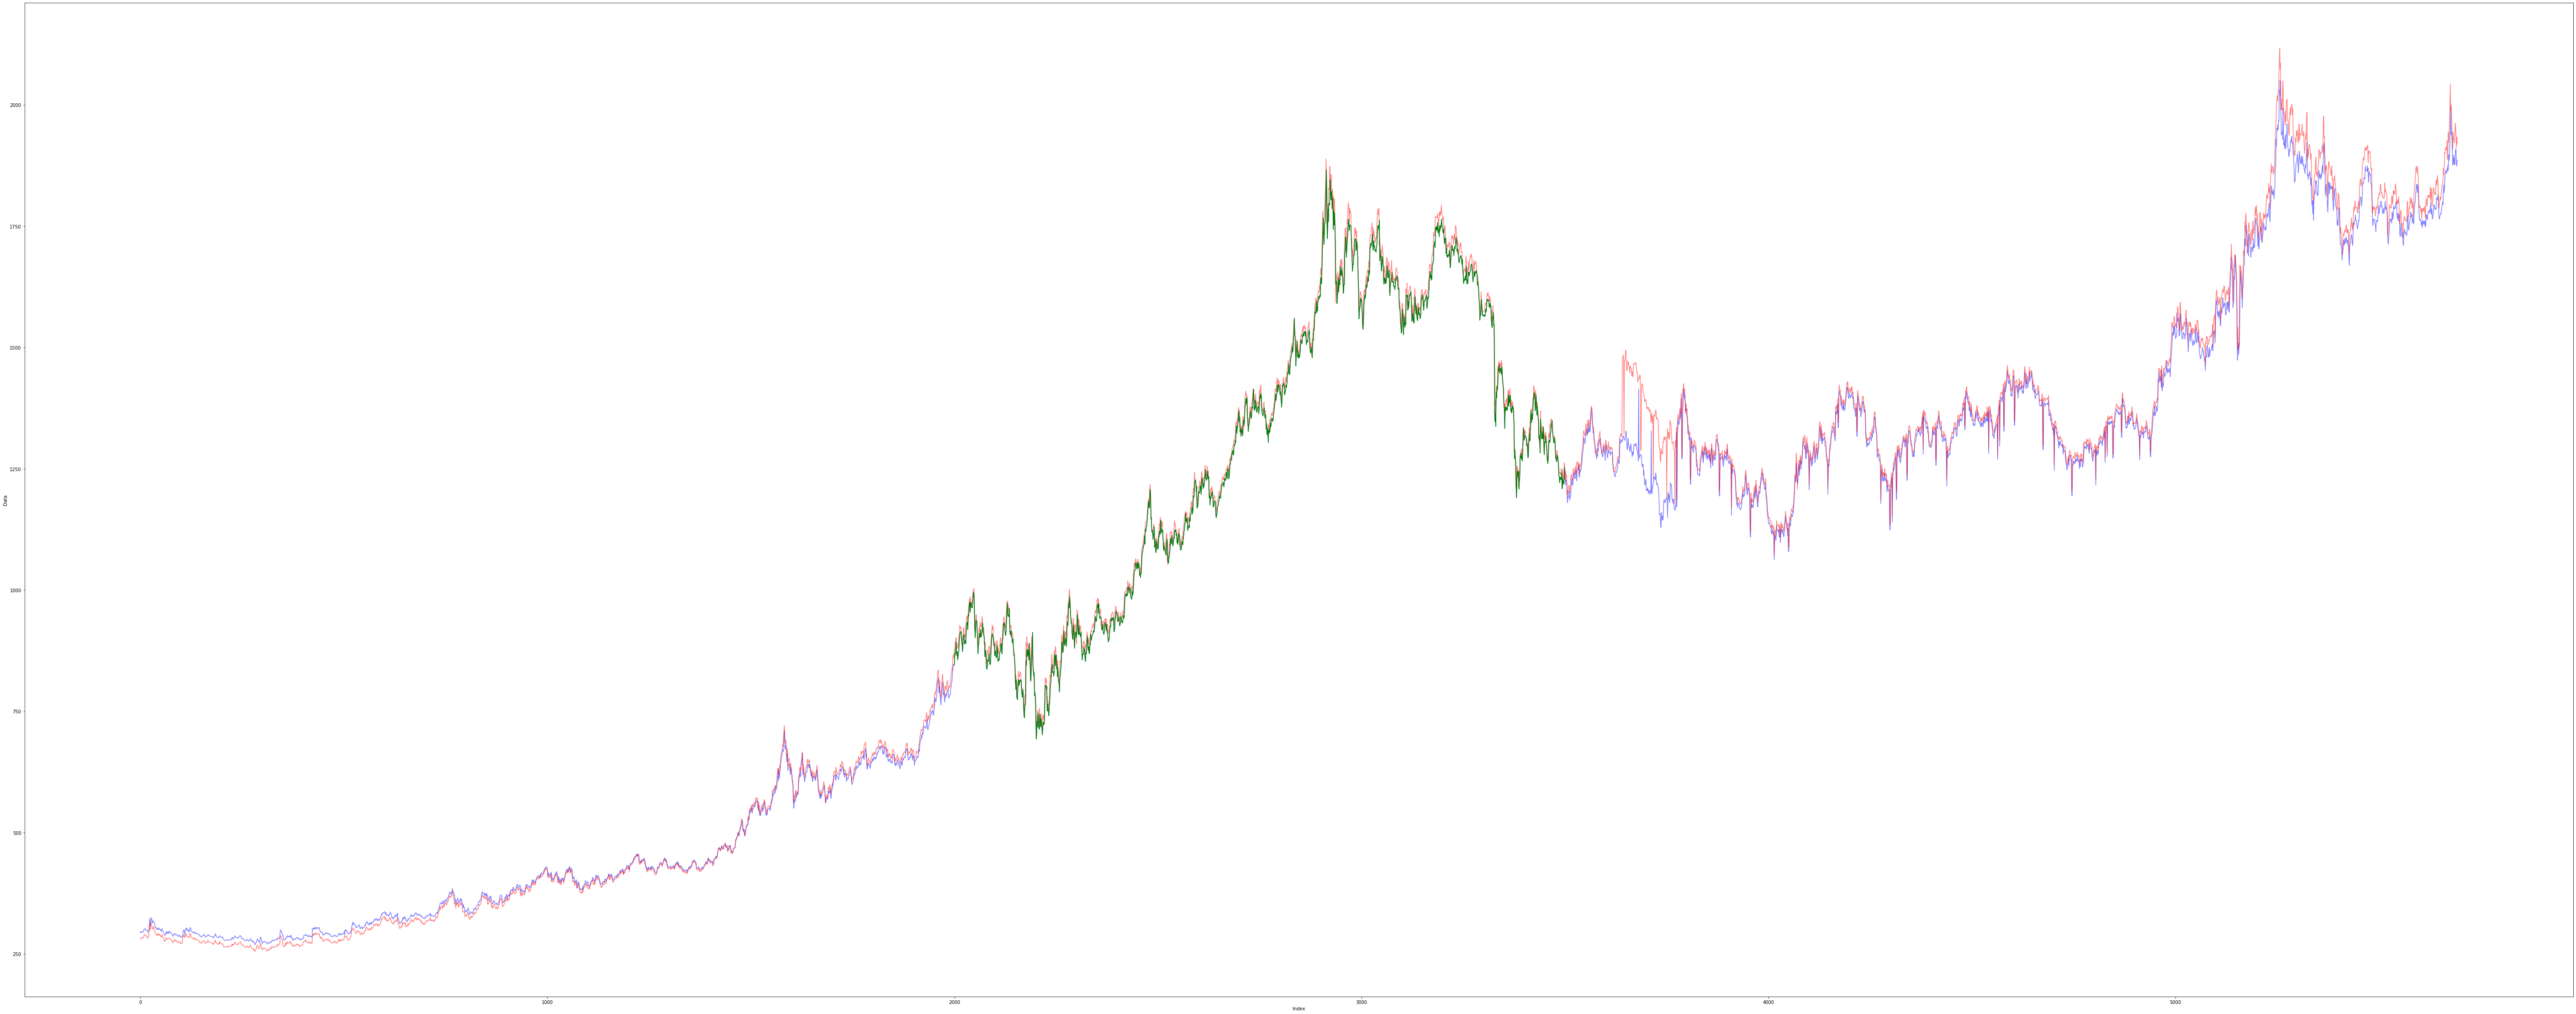

In [12]:
#Show how network predict this data. Green color - train interval.
plt.figure(figsize=(100, 40))
tick=np.arange(len(result))
plt.plot(tick, result, color='b', alpha=0.5)
plt.plot(tick, cl[:5693], color='r', alpha=0.5)
plt.plot(tick[2000:3500], result[2000:3500], color='g')
plt.xlabel("Index")
plt.ylabel("Data")
plt.show()

**We can see, that this network can predict the future close prices of gold**

**Well i want check how this network predict another classes**

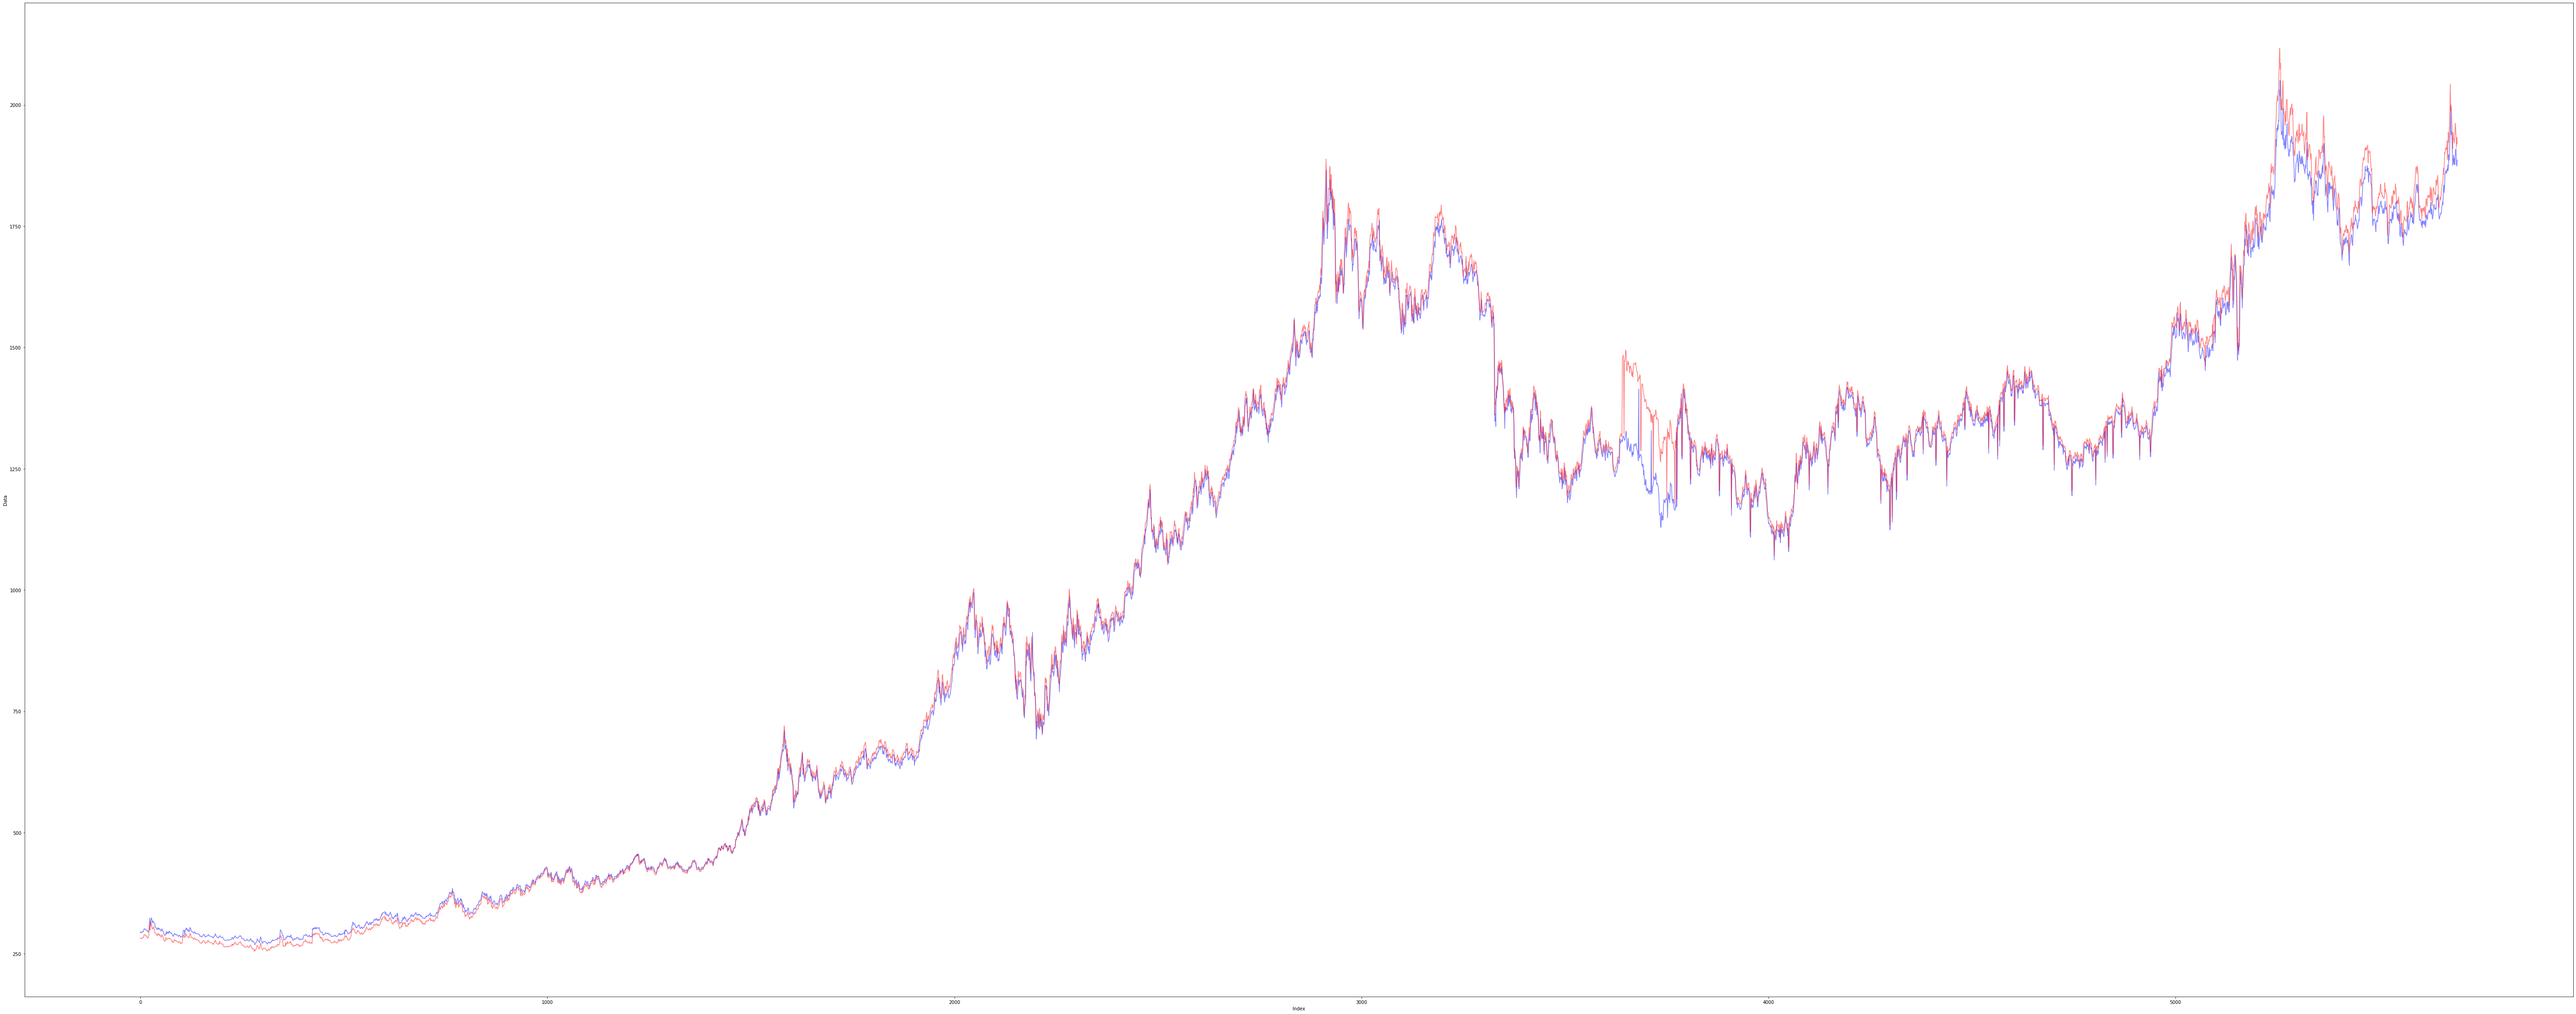

In [13]:
#Palladium

result=nreg.predict(op[5693:11386])

palladium_cl = cl[5693:11386]

result  *=std
result += mean

palladium_cl *=std
palladium_cl += mean

plt.figure(figsize=(100, 40))
tick=np.arange(len(result))
plt.plot(tick, result, color='b', alpha=0.5)
plt.plot(tick, palladium_cl, color='r', alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Data")
plt.show()

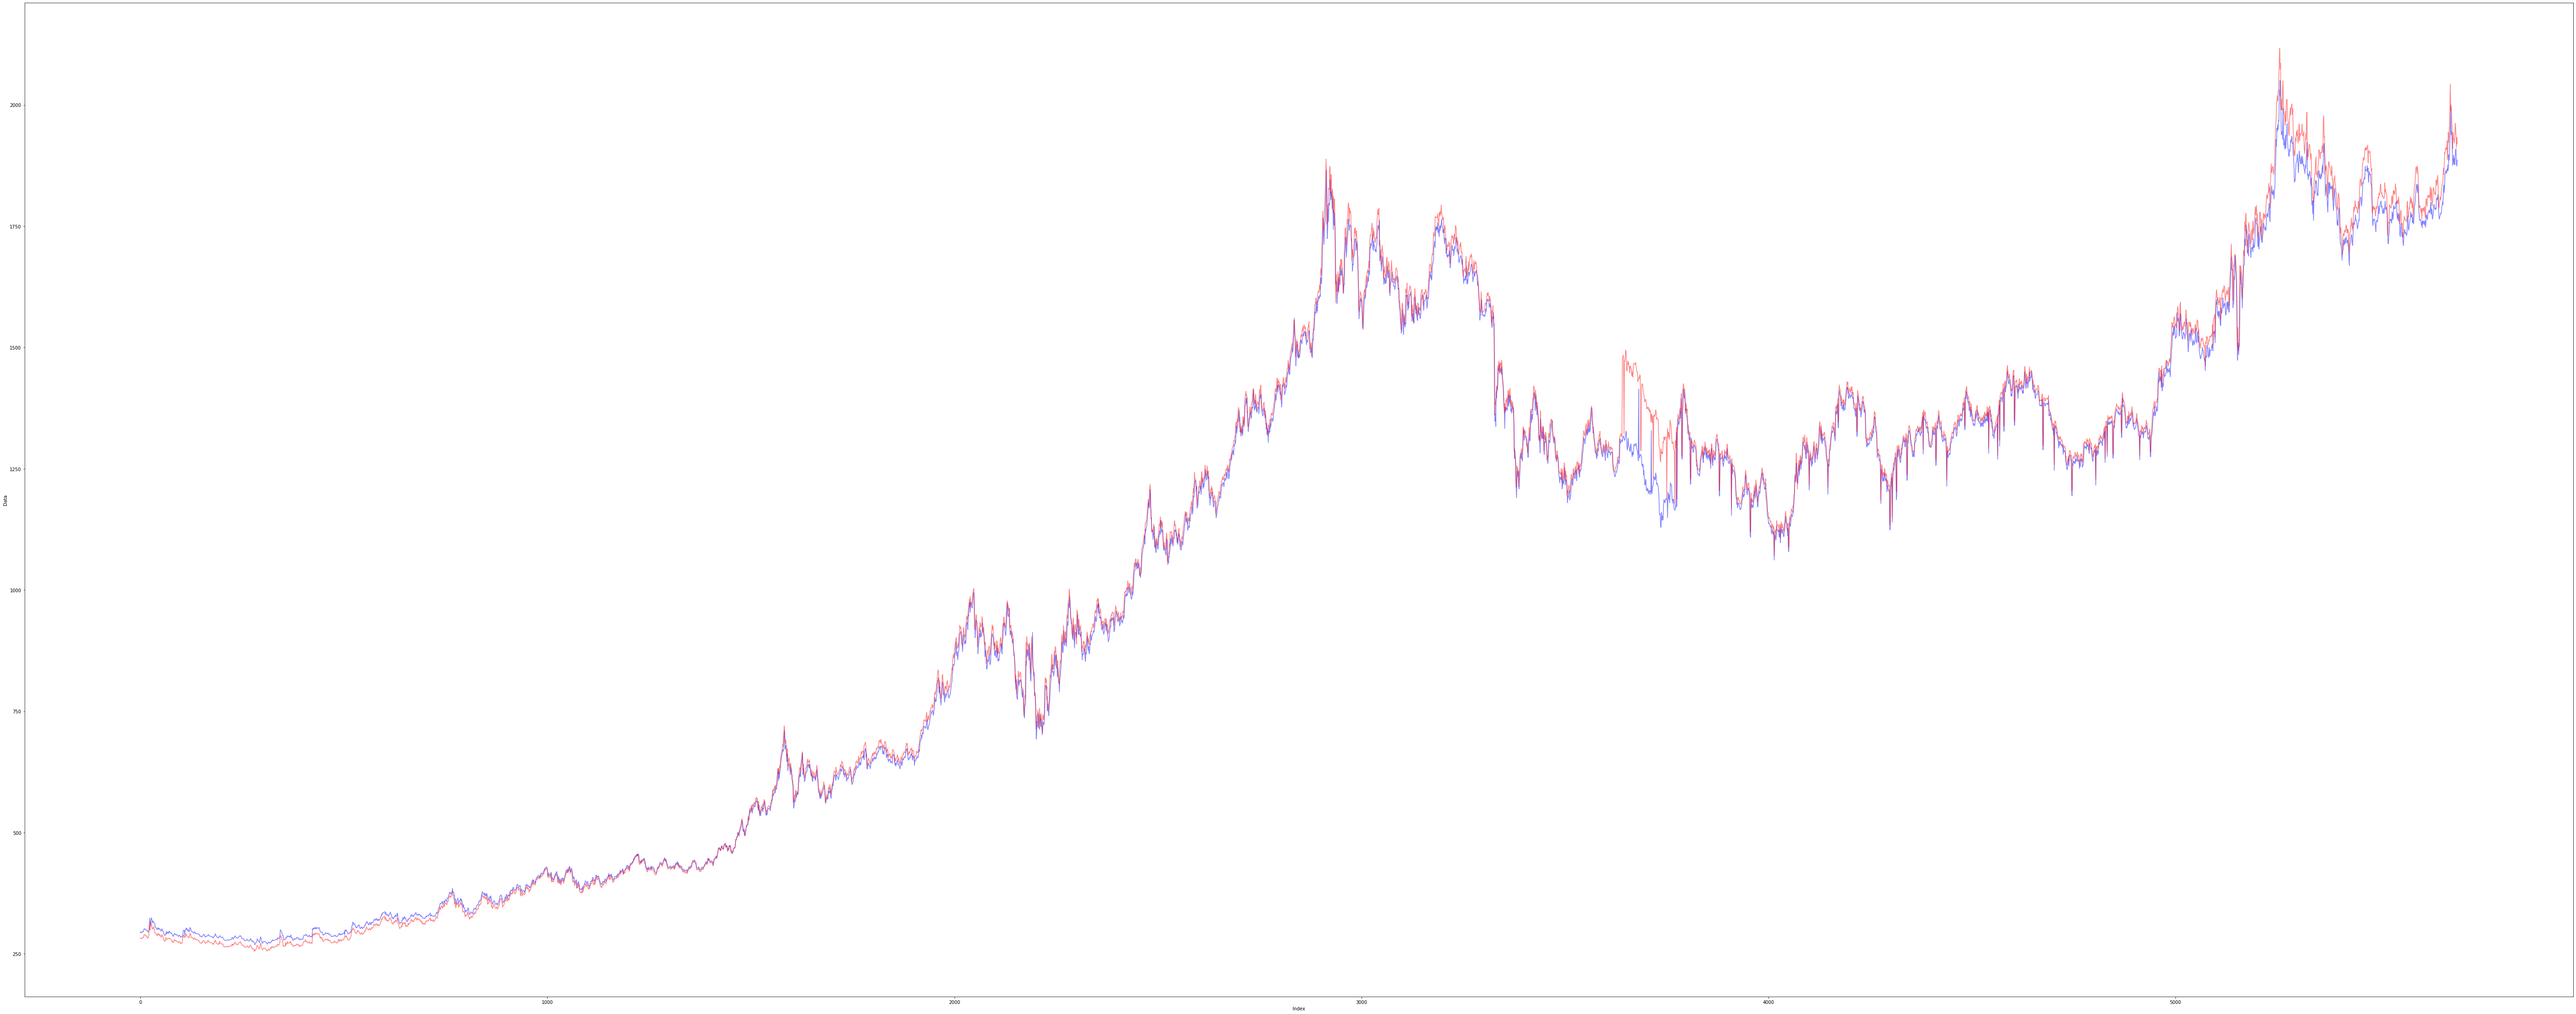

In [14]:
#Nickel

result=nreg.predict(op[5693*2:5693*3])

nickel_cl = cl[5693*2:5693*3]

result  *=std
result += mean

nickel_cl *=std
nickel_cl += mean

plt.figure(figsize=(100, 40))
tick=np.arange(len(result))
plt.plot(tick, result, color='b', alpha=0.5)
plt.plot(tick, nickel_cl, color='r', alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Data")
plt.show()

**We see, that model on 1500 input elements can predict full this case. It is possible because there is a big correlation between all classes (Gold, Palladium, Nickel and more)**

**Thanks for attention!**